# Часть 1. Проверка гипотезы в Python и составление аналитической записки

Вы предобработали данные в SQL, и теперь они готовы для проверки гипотезы в Python. Загрузите данные пользователей из Москвы и Санкт-Петербурга c суммой часов их активности из файла yandex_knigi_data.csv. Если работаете локально, скачать файл можно по ссылке.

Проверьте наличие дубликатов в идентификаторах пользователей. Сравните размеры групп, их статистики и распределение.

Напомним, как выглядит гипотеза: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

Нулевая гипотеза $H_0: \mu_{\text{СПб}} \leq \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге не больше, чем в Москве.

Альтернативная гипотеза $H_1: \mu_{\text{СПб}} > \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

По результатам анализа данных подготовьте аналитическую записку, в которой опишите:

Выбранный тип t-теста и уровень статистической значимости.

Результат теста, или p-value.

Вывод на основе полученного p-value, то есть интерпретацию результатов.

Одну или две возможные причины, объясняющие полученные результаты.

## Напишите заголовок первой части проекта здесь

- Автор:Горлов Георгий
- Дата:23.05.2025

## Цели и задачи проекта

Цель проекта: используя расчитанные данные, провести проверку гипотезы о том, что пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы.

## Описание данных

Данные представляют собой информацию о `уникальном индификаторе`, `городе проживания` и количестве `часов активности` в приложении о каждом пользователе, проживающем в Москве или Санкт-Петербурге.  

## Содержимое проекта

<font color='#777778'>Перечислите основные шаги проекта или напишите оглавление. Используйте описание проекта, чтобы зафиксировать основные шаги.</font>
1. [Загрузка и знакомство с данными](#1)
    1.1 [Поиск дубликатов](#4)
    1.2 [Сравнение тестовых групп](#5)
2. [Проверка гипотезы в Python](#2)
3. [Аналитическая записка](#3)
---

<a id='1'></a>
## 1. Загрузка данных и знакомство с ними

Загрузите данные пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания) из файла `/datasets/yandex_knigi_data.csv`.

In [1]:
# Импортируем библиотеку pandas
import pandas as pd
# Импортируем библиотеку визуализации
import matplotlib.pyplot as plt

In [2]:
# Загрузим данные в переменную knigi
knigi = pd.read_csv('https://code.s3.yandex.net/datasets/yandex_knigi_data.csv')

In [3]:
# Посмотрим на данные 
knigi

,Unnamed: 0,city,puid,hours
0,0,Москва,9668,26.167776
1,1,Москва,16598,82.111217
2,2,Москва,80401,4.656906
3,3,Москва,140205,1.840556
4,4,Москва,248755,151.326434
...,...,...,...,...
8779,8779,Санкт-Петербург,1130000028554332,4.107774
8780,8780,Санкт-Петербург,1130000030307246,45.069222
8781,8781,Санкт-Петербург,1130000038726322,0.211944
8782,8782,Санкт-Петербург,1130000047892100,4.311841


In [4]:
#Проверим информацию о пропусках и типах данных столбцов
knigi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8784 non-null   int64  
 1   city        8784 non-null   object 
 2   puid        8784 non-null   int64  
 3   hours       8784 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 274.6+ KB


In [5]:
# Уберём столбец, копирующий индекс строк
knigi = knigi.loc[:,['city','puid','hours']]
knigi

,city,puid,hours
0,Москва,9668,26.167776
1,Москва,16598,82.111217
2,Москва,80401,4.656906
3,Москва,140205,1.840556
4,Москва,248755,151.326434
...,...,...,...
8779,Санкт-Петербург,1130000028554332,4.107774
8780,Санкт-Петербург,1130000030307246,45.069222
8781,Санкт-Петербург,1130000038726322,0.211944
8782,Санкт-Петербург,1130000047892100,4.311841


__Промежуточный вывод__: По первичному знакомству можно отметить соответствие типов данных с данными из столбцов,а также отсутствие пропусков в таблице. Названия столбцов корректны. Был удалён столбец, повторяющий индекс строк.

<a id='4'></a>
### 1.1 Поиск дубликатов

In [6]:
# Найдем явные дубликаты
knigi.duplicated().sum()

0

In [7]:
#Найдем неявные дубликаты среди столбца puid
knigi.duplicated(subset='puid').sum()

244

In [8]:
# Изучим полученные дубликаты
puids=knigi[knigi.duplicated(subset=['puid'])]['puid'].to_list()
knigi[knigi['puid'].isin(puids)].sort_values(by='puid').head(10)

,city,puid,hours
35,Москва,2637041,10.317371
6247,Санкт-Петербург,2637041,3.883926
134,Москва,9979490,32.415573
6274,Санкт-Петербург,9979490,1.302997
145,Москва,10597984,42.931506
6279,Санкт-Петербург,10597984,9.041320
150,Москва,10815097,9.086655
6283,Санкт-Петербург,10815097,0.323291
187,Москва,13626259,21.104167
6300,Санкт-Петербург,13626259,1.648434


In [9]:
# Считаем количество строк до удаления
a = knigi.shape[0]
knigi = knigi[~knigi['puid'].isin(puids)]
# Считаем количество строк после удаления
b = knigi.shape[0]
print(f'Изначально строк: {a}, строк после удаления дубликатов:{b}, удалено строк {a-b}')

Изначально строк: 8784, строк после удаления дубликатов:8296, удалено строк 488


__Промежуточный вывод__: Полных дубликатов в датасете обнаружено не было. Неявных дубликатов по столбцу `puid` оказалось 488, но это можно объяснить тем, что некоторые пользователи пользовались приложение и в Москве, и в Санкт-Петербурге. Дубликаты были удалены . По остальным столбцам поиск дубликатов кажется бесмысленным из-за характера данных в самих столбцах. 

<a id='5'></a>
### 1.2 Сравнение тестовых групп

In [10]:
test_grp = knigi.groupby('city')['puid'].nunique().T
test_grp

city
Москва             5990
Санкт-Петербург    2306
Name: puid, dtype: int64

In [11]:
# Расчитываем процентную разницу
P = 100 * abs(test_grp['Москва'] - test_grp['Санкт-Петербург'])/test_grp['Москва']
P

61.502504173622704

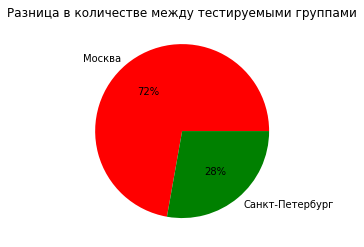

In [12]:
# Строим круговую диаграмму для визуализации соотношений количества пользователей между группами
test_grp.plot(
    kind='pie' ,
    title='Разница в количестве между тестируемыми группами',
    autopct='%.0f%%',
    ylabel= '',
    colors=['red','green']
)

plt.show()

In [13]:
#Проверяем пересечение пользователей в группах
a_group = knigi[knigi['city']=='Москва']['puid']
b_group = knigi[knigi['city']=='Санкт-Петербург']['puid']
#Создаем список пересекающихся пользователей
intersection = list(set(a_group) & set(b_group))
print(len(intersection)) 

0


In [14]:
# Посмотрим на кванттили и центральные метрики группы пользоваетелей из Москвы
knigi[knigi.city=='Москва'].describe()

,puid,hours
count,5.990000e+03,5990.000000
mean,1.037652e+13,10.848192
std,1.077902e+14,36.925622
min,9.668000e+03,0.000022
25%,3.140081e+08,0.057042
50%,8.757609e+08,0.888232
75%,1.517035e+09,5.933439
max,1.130000e+15,857.209373


In [15]:
# Посмотрим на кванттили и центральные метрики группы пользоваетелей из Москвы
knigi[knigi.city=='Санкт-Петербург'].describe()

,puid,hours
count,2.306000e+03,2306.000000
mean,5.391234e+12,11.264433
std,7.787547e+13,39.831755
min,1.049230e+05,0.000025
25%,3.594025e+08,0.060173
50%,9.265005e+08,0.875355
75%,1.542720e+09,6.138424
max,1.130000e+15,978.764775


__Промежуточный вывод__: 
- Все найденные дубликаты многовероятно являются пересченными пользователями между двумя городами. Процентная разница по пользователям состовляет чуть больше 61%, что указывает на значительное различие между группами. Количество пользователей в тестовых группах несопостовимо, большая часть всех пользователей относятся к Москве. Центральные метрики говорят, о том, что значение `hours` у пользователей из Санкт-Петербурга больше, чем из Москвы. 
- Всё это указывает на то, что в Москве пользователей больше, чем в Санкт-Петербурге. При этом пользователи из Москвы используют приложение меньше, чем пользователи из Санкт-Петербурга. 

<a id='2'></a>
## 2. Проверка гипотезы в Python

Гипотеза звучит так: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

- Нулевая гипотеза H₀: Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.

- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

Проведём статистический тест Манна-Уитни,так как размер групп несопостовим и это может повлиять на статистические показатели для других тестов.

In [16]:
from scipy.stats import ttest_ind, mannwhitneyu
# Выборка целевой метрики для группы A
metric_a = knigi[knigi.city=='Москва'].hours 
# Выборка целевой метрики для группы B
metric_b = knigi[knigi.city=='Санкт-Петербург'].hours

# На каком уровне значимости проверяем гипотезу о равенстве распределений
alpha = 0.05 

# Применяем тест Манна — Уитни
stat_mw, p_value_mw = mannwhitneyu(
    metric_a, 
    metric_b, 
    alternative='less'
) 

if p_value_mw > alpha:
    print(f'pvalue={p_value_mw} > {alpha}')
    print('Средняя активность пользователей в часах в двух группах не различается')
else:
    print(f'pvalue={p_value_mw} < {alpha}')
    print('Средняя активность пользователей в Санкт-Петербурге больше')

pvalue=0.4532273739367588 > 0.05
Средняя активность пользователей в часах в двух группах не различается


Проведём дополнительный статистический тест с альтернативной гипотезой о том, что средняя активность пользователей в Москве больше, чем в Санкт-Петербурге.

In [17]:
# Выборка целевой метрики для группы A
metric_a = knigi[knigi.city=='Москва'].hours 
# Выборка целевой метрики для группы B
metric_b = knigi[knigi.city=='Санкт-Петербург'].hours

# На каком уровне значимости проверяем гипотезу о равенстве распределений
alpha = 0.05 

# Применяем тест Манна — Уитни
stat_mw, p_value_mw = mannwhitneyu(
    metric_a, 
    metric_b, 
    alternative='greater'
) 

if p_value_mw > alpha:
    print(f'pvalue={p_value_mw} > {alpha}')
    print('Средняя активность пользователей в часах в двух группах не различается')
else:
    print(f'pvalue={p_value_mw} < {alpha}')
    print('Средняя активность пользователей в Москве больше')

pvalue=0.5467766801994849 > 0.05
Средняя активность пользователей в часах в двух группах не различается


<a id='3'></a>
## 3. Аналитическая записка
По результатам анализа данных подготовьте аналитическую записку, в которой опишете:

- Выбранный тип t-теста и уровень статистической значимости.

- Результат теста, или p-value.

- Вывод на основе полученного p-value, то есть интерпретацию результатов.

- Одну или две возможные причины, объясняющие полученные результаты.



__Аналитическая записка:__
- Из-за значительной разницы в количестве пользователей в группах был применён статистический тест Манна-Уитни. Размер статистической значимости был взят в размере 0.05 - стандартная величина для этого параметра.
- Результатом теста стало значение p-value, равное 0.08905943967440888. 
- Данное значение превышает статистическую значимость и говорит об отсутствие данных, которые бы опровергали нулевую гипотезу о том, что средняя активность пользователей в часах в двух группах не различается.
- Возможно, что пользователи в Санкт-Петербурге используют приложение чуть больше, чем пользователи в Москве. Но разница значений между двумя городами не является статистически значимой.

----

# Часть 2. Анализ результатов A/B-тестирования

Теперь вам нужно проанализировать другие данные. Представьте, что к вам обратились представители интернет-магазина BitMotion Kit, в котором продаются геймифицированные товары для тех, кто ведёт здоровый образ жизни. У него есть своя целевая аудитория, даже появились хиты продаж: эспандер со счётчиком и напоминанием, так и подстольный велотренажёр с Bluetooth.

В будущем компания хочет расширить ассортимент товаров. Но перед этим нужно решить одну проблему. Интерфейс онлайн-магазина слишком сложен для пользователей — об этом говорят отзывы.

Чтобы привлечь новых клиентов и увеличить число продаж, владельцы магазина разработали новую версию сайта и протестировали его на части пользователей. По задумке, это решение доказуемо повысит количество пользователей, которые совершат покупку.

Ваша задача — провести оценку результатов A/B-теста. В вашем распоряжении:

* данные о действиях пользователей и распределении их на группы,

* техническое задание.

Оцените корректность проведения теста и проанализируйте его результаты.

## 1. Опишите цели исследования.



__Цель исследования:__ анализ результатов тестирования новой версии сайта интернет магазина.

## 2. Загрузите данные, оцените их целостность.


In [18]:
participants = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_participants.csv')
events = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_events.zip',
                     parse_dates=['event_dt'], low_memory=False)

In [19]:
# Проверим общую информацию о таблице participants
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
 3   device   14525 non-null  object
dtypes: object(4)
memory usage: 454.0+ KB


In [20]:
# Посмотрим на данные таблицы
participants

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
1,001064FEAAB631A1,B,recommender_system_test,Android
2,001064FEAAB631A1,A,interface_eu_test,Android
3,0010A1C096941592,A,recommender_system_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac
...,...,...,...,...
14520,FFE7FC140521F5F6,A,interface_eu_test,PC
14521,FFEFC0E55C1CCD4F,A,interface_eu_test,PC
14522,FFF28D02B1EACBE1,B,recommender_system_test,PC
14523,FFF28D02B1EACBE1,B,interface_eu_test,PC


In [21]:
# Проверим общую информацию о таблице events
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787286 entries, 0 to 787285
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     787286 non-null  object        
 1   event_dt    787286 non-null  datetime64[ns]
 2   event_name  787286 non-null  object        
 3   details     249022 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 24.0+ MB


In [22]:
# Просмотрим на данные таблицы
events

,user_id,event_dt,event_name,details
0,GLOBAL,2020-12-01 00:00:00,End of Black Friday Ads Campaign,ZONE_CODE15
1,CCBE9E7E99F94A08,2020-12-01 00:00:11,registration,0.0
2,GLOBAL,2020-12-01 00:00:25,product_page,NaN
3,CCBE9E7E99F94A08,2020-12-01 00:00:33,login,NaN
4,CCBE9E7E99F94A08,2020-12-01 00:00:52,product_page,NaN
...,...,...,...,...
787281,1A655C280B064708,2020-12-31 23:57:44,product_page,NaN
787282,B77B2F4BCA134618,2020-12-31 23:58:23,registration,0.0
787283,GLOBAL,2020-12-31 23:58:30,product_cart,NaN
787284,B12AD1623E494FAD,2020-12-31 23:58:34,registration,-6.52


---
В таблице `participants` отсутствуют пропуски, тип данных столбцов соотностися со значениями в них. В таблице `events`, в столбце `details` из 787286 строк только 249022 не являются пустыми, однако в столбце содержится лишь дополнительная информация. Все остальные столбцы не содержат пропусков, а их тип данных соответствуют смыслу информации в столбце.

---

## 3. По таблице `ab_test_participants` оцените корректность проведения теста:

   3\.1 Выделите пользователей, участвующих в тесте, и проверьте:

   - соответствие требованиям технического задания,

   - равномерность распределения пользователей по группам теста,

   - отсутствие пересечений с конкурирующим тестом (нет пользователей, участвующих одновременно в двух тестовых группах).

In [23]:
#Проверяем пересечение пользователей в группах
a_group = participants[participants['ab_test']=='interface_eu_test']['user_id']
b_group = participants[participants['ab_test']=='recommender_system_test']['user_id']
#Создаем список пересекающихся пользователей
intersection = list(set(a_group) & set(b_group))
print(len(intersection)) 

887


In [24]:
# Уберём пересекающихся в тестах пользователей
participants = participants[~participants['user_id'].isin(intersection)]
participants

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
3,0010A1C096941592,A,recommender_system_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac
5,002412F1EB3F6E38,B,interface_eu_test,Mac
6,002540BE89C930FB,B,interface_eu_test,Android
...,...,...,...,...
14518,FFE5B14BD55C1C5C,A,interface_eu_test,PC
14519,FFE600EEC4BA7685,B,interface_eu_test,Android
14520,FFE7FC140521F5F6,A,interface_eu_test,PC
14521,FFEFC0E55C1CCD4F,A,interface_eu_test,PC


In [25]:
# Выделим только пользователей, которые участвуют в тесте
new_participants = participants[participants.ab_test=='interface_eu_test']
new_participants 

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
4,001E72F50D1C48FA,A,interface_eu_test,Mac
5,002412F1EB3F6E38,B,interface_eu_test,Mac
6,002540BE89C930FB,B,interface_eu_test,Android
7,0031F1B5E9FBF708,A,interface_eu_test,Android
...,...,...,...,...
14518,FFE5B14BD55C1C5C,A,interface_eu_test,PC
14519,FFE600EEC4BA7685,B,interface_eu_test,Android
14520,FFE7FC140521F5F6,A,interface_eu_test,PC
14521,FFEFC0E55C1CCD4F,A,interface_eu_test,PC


In [26]:
# Сгруппируем данные по группам тестирования
group_data = new_participants.groupby('group')['user_id'].nunique()
group_data

group
A    4952
B    5011
Name: user_id, dtype: int64

In [27]:
# Расчитываем процентную разницу
P = 100 * abs(group_data['A'] - group_data['B'])/group_data['A']
P

1.191437802907916

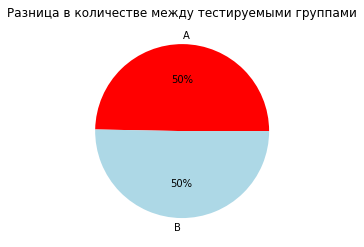

In [28]:
# Визуализируем сгруппированыые данные
group_data.plot(
    kind='pie' ,
    title='Разница в количестве между тестируемыми группами',
    autopct='%.0f%%',
    ylabel= '',
    colors=['red','lightblue']
)

plt.show()

In [29]:
#Проверяем пересечение пользователей в группах
a_group = new_participants[new_participants['group']=='A']['user_id']
b_group = new_participants[new_participants['group']=='B']['user_id']
#Создаем список пересекающихся пользователей
intersection = list(set(a_group) & set(b_group))
print(intersection) 

[]


In [30]:
# Проверим таблицу на дубликаты
new_participants.duplicated().sum()

0

---
- Проверка таблицы `participants` показала, что пользователи равномерно распределены по группам тестирования, а разница в количестве пользователей состовляет ~1.2%, при допустимых 10-15%
- В группах отсутствуют пересекающиеся пользователи.

---

3\.2 Проанализируйте данные о пользовательской активности по таблице `ab_test_events`:

- оставьте только события, связанные с участвующими в изучаемом тесте пользователями;

In [31]:
# Соберём все id пользователей из таблицы new_participants
ids = new_participants.user_id.to_list()

In [32]:
# Выберем события, связанные с пользователями из теста
new_ab_test = events[events['user_id'].isin(ids)].reset_index()
new_ab_test

,index,user_id,event_dt,event_name,details
0,64672,5F506CEBEDC05D30,2020-12-06 14:10:01,registration,0.0
1,64946,51278A006E918D97,2020-12-06 14:37:25,registration,-3.8
2,66585,A0C1E8EFAD874D8B,2020-12-06 17:20:22,registration,-3.32
3,67873,275A8D6254ACF530,2020-12-06 19:36:54,registration,-0.48
4,67930,0B704EB2DC7FCA4B,2020-12-06 19:42:20,registration,0.0
...,...,...,...,...,...
73810,777479,F80C9BDDEA02E53C,2020-12-30 10:02:43,purchase,4.49
73811,777488,F80C9BDDEA02E53C,2020-12-30 10:03:51,purchase,4.49
73812,777489,F80C9BDDEA02E53C,2020-12-30 10:03:52,product_cart,NaN
73813,778138,6181F3835EBE66BF,2020-12-30 12:10:39,product_cart,NaN


- определите горизонт анализа: рассчитайте время (лайфтайм) совершения события пользователем после регистрации и оставьте только те события, которые были выполнены в течение первых семи дней с момента регистрации;

In [33]:
# Создадим таблицу, которая будет хранить дату регистрации пользователей
user_registration = new_ab_test[new_ab_test['event_name'] == 'registration'][['user_id','event_dt']]
user_registration.rename(columns={'event_dt': 'registration_dt'}, inplace=True)
# Объединим таблицы
new_ab_test = pd.merge(new_ab_test, user_registration, on='user_id', how='left')
# Вычислим, сколько дней прошло от момента активности с момента регистрации
new_ab_test['days_from_registration'] = new_ab_test['event_dt'] - new_ab_test['registration_dt']
#Отфильтруем по количеству дней
new_ab_test = new_ab_test[new_ab_test['days_from_registration'] <= pd.Timedelta(days=7)]


In [34]:
# Уберём столбец со старыми индексами
new_ab_test = new_ab_test.iloc[:,1:].reset_index()
new_ab_test = new_ab_test.iloc[:,1:]
new_ab_test

,user_id,event_dt,event_name,details,registration_dt,days_from_registration
0,5F506CEBEDC05D30,2020-12-06 14:10:01,registration,0.0,2020-12-06 14:10:01,0 days 00:00:00
1,51278A006E918D97,2020-12-06 14:37:25,registration,-3.8,2020-12-06 14:37:25,0 days 00:00:00
2,A0C1E8EFAD874D8B,2020-12-06 17:20:22,registration,-3.32,2020-12-06 17:20:22,0 days 00:00:00
3,275A8D6254ACF530,2020-12-06 19:36:54,registration,-0.48,2020-12-06 19:36:54,0 days 00:00:00
4,0B704EB2DC7FCA4B,2020-12-06 19:42:20,registration,0.0,2020-12-06 19:42:20,0 days 00:00:00
...,...,...,...,...,...,...
63800,E89AF4EFC757D283,2020-12-29 21:46:43,product_cart,NaN,2020-12-23 09:35:48,6 days 12:10:55
63801,E89AF4EFC757D283,2020-12-29 21:47:56,product_cart,NaN,2020-12-23 09:35:48,6 days 12:12:08
63802,A6AFDC94A0D3B23D,2020-12-29 22:47:00,product_page,NaN,2020-12-23 13:53:33,6 days 08:53:27
63803,A6AFDC94A0D3B23D,2020-12-29 22:48:46,product_page,NaN,2020-12-23 13:53:33,6 days 08:55:13


In [35]:
print('Максимальное время между регистрацией и действием пользователя:',new_ab_test['days_from_registration'].max())

Максимальное время между регистрацией и действием пользователя: 6 days 23:58:10


Оцените достаточность выборки для получения статистически значимых результатов A/B-теста. Заданные параметры:

- базовый показатель конверсии — 30%,

- мощность теста — 80%,

- достоверность теста — 95%.

In [36]:
from statsmodels.stats.power import NormalIndPower

# Задаём параметры
alpha = 0.05  # Уровень значимости
power = 0.8  # Мощность теста
conversion = 0.3 
mde = 0.03 # Минимальный детектируемый эффект
effect_size = conversion + mde
# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = effect_size,
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 144


- рассчитайте для каждой группы количество посетителей, сделавших покупку, и общее количество посетителей.

In [37]:
# Объединим таблицы с пользователями и действиями пользователей
union_table = pd.merge(new_participants,new_ab_test,on = 'user_id')
union_table

,user_id,group,ab_test,device,event_dt,event_name,details,registration_dt,days_from_registration
0,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:37:31,registration,-2.38,2020-12-07 04:37:31,0 days 00:00:00
1,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:37:49,login,NaN,2020-12-07 04:37:31,0 days 00:00:18
2,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:37:57,login,NaN,2020-12-07 04:37:31,0 days 00:00:26
3,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:38:54,login,NaN,2020-12-07 04:37:31,0 days 00:01:23
4,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-08 22:15:35,login,NaN,2020-12-07 04:37:31,1 days 17:38:04
...,...,...,...,...,...,...,...,...,...
63800,FFEFC0E55C1CCD4F,A,interface_eu_test,PC,2020-12-13 23:52:15,registration,0.0,2020-12-13 23:52:15,0 days 00:00:00
63801,FFEFC0E55C1CCD4F,A,interface_eu_test,PC,2020-12-13 23:52:22,login,NaN,2020-12-13 23:52:15,0 days 00:00:07
63802,FFF58BC33966EB51,A,interface_eu_test,Android,2020-12-13 17:37:34,registration,-0.45,2020-12-13 17:37:34,0 days 00:00:00
63803,FFF58BC33966EB51,A,interface_eu_test,Android,2020-12-13 17:56:02,login,NaN,2020-12-13 17:37:34,0 days 00:18:28


In [38]:
# Сгруппируем данные по группам тестирования
union_grp = union_table.groupby('group').agg(
    purchase_users=('user_id', lambda x: union_table.loc[(union_table['event_name'] == 'purchase') & (union_table['user_id'].isin(x)), 'user_id'].nunique()),
    all_users=('user_id', 'nunique')
)
union_grp

,purchase_users,all_users
group,,
A,1377,4952
B,1480,5011


In [39]:
# Расчитываем процентную разницу
P = 100 * abs(union_grp['purchase_users']['A'] - union_grp['purchase_users']['B'])/union_grp['purchase_users']['A']
P

7.480029048656499

- сделайте предварительный общий вывод об изменении пользовательской активности в тестовой группе по сравнению с контрольной.

__Промежуточный вывод:__ 
После проведённой агрегации данных, можно увидеть, что показатель пользователей, сделавших покупку, в тестовой группе выше, чем в контрольной групее. Процентная разница состовляет больше ~7.5%. 

## 4. Проведите оценку результатов A/B-тестирования:

- Проверьте изменение конверсии подходящим статистическим тестом, учитывая все этапы проверки гипотез.

___
Предыдущий аналитик проверял полное обновление дизайна сайта. Гипотеза заключается в следующем: упрощение интерфейса приведёт к тому, что в течение семи дней после регистрации в системе конверсия зарегистрированных пользователей в покупателей увеличится как минимум на три процентных пункта. 
Проверим гипотезу, использовав Z-тест пропорций. 
___

In [40]:
# Используем Z-тест пропорций для анализа изменении конверсии пользователей
from statsmodels.stats.proportion import proportions_ztest


n_a = union_table[ 
    union_table.group=='A'
].shape[0] 

n_b = union_table[ 
    union_table.group=='B'
].shape[0] 


m_a = union_table[ 
    (union_table.group=='A')&(union_table.event_name=='purchase')
].shape[0] 

m_b = union_table[ 
    (union_table.group=='B')&(union_table.event_name=='purchase')
].shape[0] 

p_a, p_b = m_a/n_a, m_b/n_b 

if (p_a*n_a > 10)and((1-p_a)*n_a > 10)and(p_b*n_b > 10)and((1-p_b)*n_b > 10):
    print('Предпосылка о достаточном количестве данных выполняется!')
else:
    print('Предпосылка о достаточном количестве данных НЕ выполняется!')


stat_ztest, p_value_ztest = proportions_ztest( 
    [m_a,m_b],
    [n_a,n_b],
	alternative='smaller'
)

alpha = 0.05

print(f'pvalue={p_value_ztest}') 

if p_value_ztest > alpha:
    print('Упрощение интерфейса не показало эффекта') 
else:
    print('Упрощение интерфейса показало эффект')

Предпосылка о достаточном количестве данных выполняется!
pvalue=5.5618798640599e-18
Упрощение интерфейса показало эффект


- Опишите выводы по проведённой оценке результатов A/B-тестирования. Что можно сказать про результаты A/B-тестирования? Был ли достигнут ожидаемый эффект в изменении конверсии?

__Выводы о проведённой оценке результатов A/B тестирования__

---
- По результатам тестрования можно сделать вывод, что упрощения интерфейса оказалось в пользу интернет-магазину. Покупающих пользователей в тестируемой группе оказалось больше, чем в контрольной группе.
- Гипотеза о том, что упрощение интерфейса приведёт к тому, что в течение семи дней после регистрации в системе конверсия  пользователей в покупателей увеличится как минимум на три процентных пункта подтверждается.
- Конверсия увеличилась на ~7.5%

---